# 1. Install and Import Dependencies

In [1]:
# !pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


You should consider upgrading via the 'C:\Users\visha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html --user

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


You should consider upgrading via the 'C:\Users\visha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
!cd yolov5 & pip install -r requirements.txt

You should consider upgrading via the 'C:\Users\visha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Models

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\visha/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-2-20 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce MX110, 2048MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [8]:
model


AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [14]:
img = 'https://media.istockphoto.com/photos/man-driving-his-car-and-squinting-picture-id155016018?k=20&m=155016018&s=612x612&w=0&h=qQSZhbDhANoKRF97iMC0AdUILXP7PsT9HRCYvASxtWU='

In [15]:
results = model(img)
results.print()

image 1/1: 408x612 1 person
Speed: 810.1ms pre-process, 327.2ms inference, 15.6ms NMS per image at shape (1, 3, 448, 640)


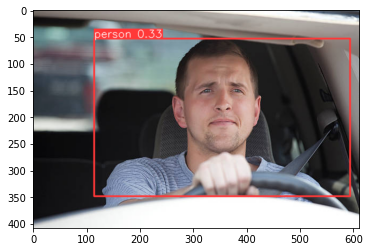

In [16]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Real Time Detections

In [20]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # Exiting capture
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from Scratch

In [3]:
import uuid  # Unique identifier
import os
import time

In [3]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [4]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [7]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.9262d5c6-9545-11ec-81a6-1062e5e47ee5.jpg


In [8]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.18b07f60-9546-11ec-b5f9-1062e5e47ee5.jpg
data\images\awake.18b07f61-9546-11ec-ad0e-1062e5e47ee5.jpg
data\images\awake.18b0a4eb-9546-11ec-ad9a-1062e5e47ee5.jpg
data\images\awake.18b0a4ec-9546-11ec-bb4e-1062e5e47ee5.jpg
data\images\awake.18b0a4ed-9546-11ec-889c-1062e5e47ee5.jpg
data\images\awake.18b0a4ee-9546-11ec-af36-1062e5e47ee5.jpg
data\images\awake.18b0a4ef-9546-11ec-88a9-1062e5e47ee5.jpg
data\images\awake.18b0a4f0-9546-11ec-a523-1062e5e47ee5.jpg
data\images\awake.18b0a4f1-9546-11ec-8368-1062e5e47ee5.jpg
data\images\awake.18b0a4f2-9546-11ec-846e-1062e5e47ee5.jpg
data\images\awake.18b0a4f3-9546-11ec-b226-1062e5e47ee5.jpg
data\images\awake.18b0a4f4-9546-11ec-a84d-1062e5e47ee5.jpg
data\images\awake.18b0a4f5-9546-11ec-92e2-1062e5e47ee5.jpg
data\images\awake.18b0a4f6-9546-11ec-923e-1062e5e47ee5.jpg
data\images\awake.18b0ce42-9546-11ec-a840-1062e5e47ee5.jpg
data\images\awake.18b0d18e-9546-11ec-bd3a-1062e5e47ee5.jpg
data\images\awake.18b0d3b2-9546-11ec-a2ca-1062e5e47ee5.j

In [9]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [10]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

You should consider upgrading via the 'C:\Users\visha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.4
    Uninstalling lxml-4.6.4:
      Successfully uninstalled lxml-4.6.4


In [3]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt

Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   4bab565..a0a4adf  master              -> origin/master
   fea1ed1..d1e2938  classifier          -> origin/classifier
 * [new branch]      test/alive_progress -> origin/test/alive_progress
 * [new branch]      test/conv_reduction -> origin/test/conv_reduction
 * [new branch]      test/decouple       -> origin/test/decouple
 * [new branch]      update/dataloader   -> origin/update/dataload


  0%|          | 0/3 [00:00<?, ?it/s]
    11/499        0G   0.08328   0.02018   0.06509        31       320:   0%|          | 0/3 [00:04<?, ?it/s]
    11/499        0G   0.08328   0.02018   0.06509        31       320:  33%|###3      | 1/3 [00:04<00:09,  4.97s/it]
    11/499        0G   0.08164    0.0219   0.06432        31       320:  33%|###3      | 1/3 [00:09<00:09,  4.97s/it]
    11/499        0G   0.08164    0.0219   0.06432        31       320:  67%|######6   | 2/3 [00:09<00:04,  4.95s/it]
    11/499        0G   0.08102   0.02166   0.06306        16       320:  67%|######6   | 2/3 [00:12<00:04,  4.95s/it]
    11/499        0G   0.08102   0.02166   0.06306        16       320: 100%|##########| 3/3 [00:12<00:00,  3.81s/it]
    11/499        0G   0.08102   0.02166   0.06306        16       320: 100%|##########| 3/3 [00:12<00:00,  4.12s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               C

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:04<00:04,  4.76s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:05<00:00,  2.49s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:05<00:00,  2.83s/it]
                 all         40         40      0.942        0.9      0.954      0.692

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   119/499        0G   0.04704  0.009498   0.01314        27       320:   0%|          | 0/3 [00:05<?, ?it/s]
   119/499        0G   0.04704  0.009498   0.01314        27       320:  33%|###3      | 1/3 [00:05<00:10,  5.28s/it]
   119/499        0G   0.04634   0.01067   0.0

  0%|          | 0/3 [00:00<?, ?it/s]
   143/499        0G   0.05042   0.00762   0.01918        25       320:   0%|          | 0/3 [00:04<?, ?it/s]
   143/499        0G   0.05042   0.00762   0.01918        25       320:  33%|###3      | 1/3 [00:04<00:09,  4.92s/it]
   143/499        0G   0.04974  0.007905   0.01437        29       320:  33%|###3      | 1/3 [00:09<00:09,  4.92s/it]
   143/499        0G   0.04974  0.007905   0.01437        29       320:  67%|######6   | 2/3 [00:09<00:04,  4.94s/it]
   143/499        0G   0.04807  0.008339   0.01408        12       320:  67%|######6   | 2/3 [00:12<00:04,  4.94s/it]
   143/499        0G   0.04807  0.008339   0.01408        12       320: 100%|##########| 3/3 [00:12<00:00,  3.74s/it]
   143/499        0G   0.04807  0.008339   0.01408        12       320: 100%|##########| 3/3 [00:12<00:00,  4.06s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Cl

   195/499        0G   0.04115  0.008016  0.008844        29       320:  33%|###3      | 1/3 [00:04<00:09,  4.89s/it]
   195/499        0G   0.04269  0.007773    0.0115        25       320:  33%|###3      | 1/3 [00:09<00:09,  4.89s/it]
   195/499        0G   0.04269  0.007773    0.0115        25       320:  67%|######6   | 2/3 [00:09<00:04,  4.79s/it]
   195/499        0G   0.04241  0.008919   0.01034        19       320:  67%|######6   | 2/3 [00:11<00:04,  4.79s/it]
   195/499        0G   0.04241  0.008919   0.01034        19       320: 100%|##########| 3/3 [00:11<00:00,  3.69s/it]
   195/499        0G   0.04241  0.008919   0.01034        19       320: 100%|##########| 3/3 [00:11<00:00,  4.00s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:02<00:02,  2.96s/it]
               Class     Images


  0%|          | 0/3 [00:00<?, ?it/s]
   248/499        0G   0.02714  0.008025  0.007702        34       320:   0%|          | 0/3 [00:04<?, ?it/s]
   248/499        0G   0.02714  0.008025  0.007702        34       320:  33%|###3      | 1/3 [00:04<00:09,  4.67s/it]
   248/499        0G   0.02764  0.007883   0.00705        32       320:  33%|###3      | 1/3 [00:09<00:09,  4.67s/it]
   248/499        0G   0.02764  0.007883   0.00705        32       320:  67%|######6   | 2/3 [00:09<00:04,  4.54s/it]
   248/499        0G   0.02747  0.007925  0.006981        17       320:  67%|######6   | 2/3 [00:11<00:04,  4.54s/it]
   248/499        0G   0.02747  0.007925  0.006981        17       320: 100%|##########| 3/3 [00:11<00:00,  3.50s/it]
   248/499        0G   0.02747  0.007925  0.006981        17       320: 100%|##########| 3/3 [00:11<00:00,  3.79s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               C

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:02<00:02,  2.76s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:03<00:00,  1.48s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:03<00:00,  1.67s/it]
                 all         40         40      0.976      0.997      0.995      0.863

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]
   324/499        0G   0.02243  0.005385  0.009996        27       320:   0%|          | 0/3 [00:04<?, ?it/s]
   324/499        0G   0.02243  0.005385  0.009996        27       320:  33%|###3      | 1/3 [00:04<00:09,  4.61s/it]
   324/499        0G   0.02214  0.006103  0.009719        34       320:  33%|###3      | 1/3 [00:09<00:09,  4.61s/it]
   324/499        0G   0.02214  0.006103  0.009719    

   371/499        0G   0.01914  0.005718  0.006548        30       320:  67%|######6   | 2/3 [00:09<00:04,  4.72s/it]
   371/499        0G   0.01807  0.005567    0.0055        16       320:  67%|######6   | 2/3 [00:11<00:04,  4.72s/it]
   371/499        0G   0.01807  0.005567    0.0055        16       320: 100%|##########| 3/3 [00:11<00:00,  3.55s/it]
   371/499        0G   0.01807  0.005567    0.0055        16       320: 100%|##########| 3/3 [00:11<00:00,  3.89s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/2 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 1/2 [00:02<00:02,  2.79s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:03<00:00,  1.53s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:03<00:00,  1.72s/it]

# 6. Load Custom Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\visha/.cache\torch\hub\master.zip
YOLOv5  2022-4-3 torch 1.8.2+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [15]:
img = os.path.join('data', 'images', 'drowsy.a22800bb-9ed3-11ec-a700-1062e5e47ee5.jpg')

In [16]:
results = model(img)

In [17]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 15.6ms pre-process, 250.4ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


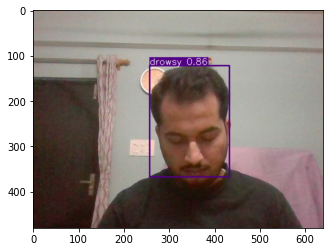

In [18]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [76]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()